In [1]:
!wget http://www.soshnikov.com/permanent/data/akar_en.txt

--2024-12-14 15:46:24--  http://www.soshnikov.com/permanent/data/akar_en.txt
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2068089 (2.0M) [text/plain]
Saving to: ‘akar_en.txt’

akar_en.txt         100%[===================>]   1.97M   257KB/s    in 8.4s    

2024-12-14 15:46:34 (240 KB/s) - ‘akar_en.txt’ saved [2068089/2068089]



In [16]:
with open('akar_en.txt') as f:
  text = f.read()

text = text[793:]
print(text[:1000])

Chapter 1

Happy families are all alike; every unhappy family is unhappy in its
own way.

Everything was in confusion in the Oblonskys’ house. The wife had
discovered that the husband was carrying on an intrigue with a French
girl, who had been a governess in their family, and she had announced
to her husband that she could not go on living in the same house with
him. This position of affairs had now lasted three days, and not only
the husband and wife themselves, but all the members of their family
and household, were painfully conscious of it. Every person in the
house felt that there was no sense in their living together, and that
the stray people brought together by chance in any inn had more in
common with one another than they, the members of the family and
household of the Oblonskys. The wife did not leave her own room, the
husband had not been at home for three days. The children ran wild all
over the house; the English governess quarreled with the housekeeper,
and wrote to a f

In [19]:
'one two three'.split(' ')

['one', 'two', 'three']

In [20]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def mysplit(s):
  for x in string.punctuation+'—“”':
    s = s.replace(x,' ')
  return s.split()

In [31]:
words = mysplit(text.lower())
words[:10]

['chapter',
 '1',
 'happy',
 'families',
 'are',
 'all',
 'alike',
 'every',
 'unhappy',
 'family']

In [32]:
len(words)

355319

In [33]:
len(set(words))

13447

In [34]:
u = []
for x in words:
  if x not in u:
    u.append(x)
len(u)

13447

In [36]:
d = {}
for x in words:
  if x not in d:
    d[x] = 1
  else:
    d[x] = d[x]+1

len(d)


13447

In [43]:
sorted(d.items(),key=lambda x: -x[1])[:10]

[('the', 17734),
 ('and', 12973),
 ('to', 10233),
 ('of', 8735),
 ('he', 7537),
 ('a', 6219),
 ('in', 6079),
 ('was', 5310),
 ('his', 5240),
 ('that', 5219)]

In [48]:
fw = sorted(((k,v) for k,v in d.items() if len(k)>4),key=lambda x: -x[1])[:13]
fw

[('levin', 1517),
 ('which', 1084),
 ('would', 1048),
 ('there', 1020),
 ('could', 972),
 ('about', 790),
 ('vronsky', 776),
 ('their', 703),
 ('alexey', 629),
 ('himself', 615),
 ('kitty', 599),
 ('thought', 569),
 ('don’t', 551)]

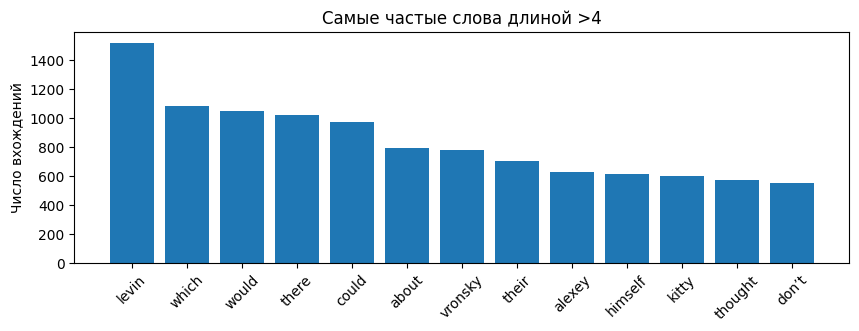

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.bar([k for k,v in fw],[v for k,v in fw])
plt.title('Самые частые слова длиной >4')
plt.ylabel('Число вхождений')
plt.xticks(rotation=45)
plt.show()

In [55]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


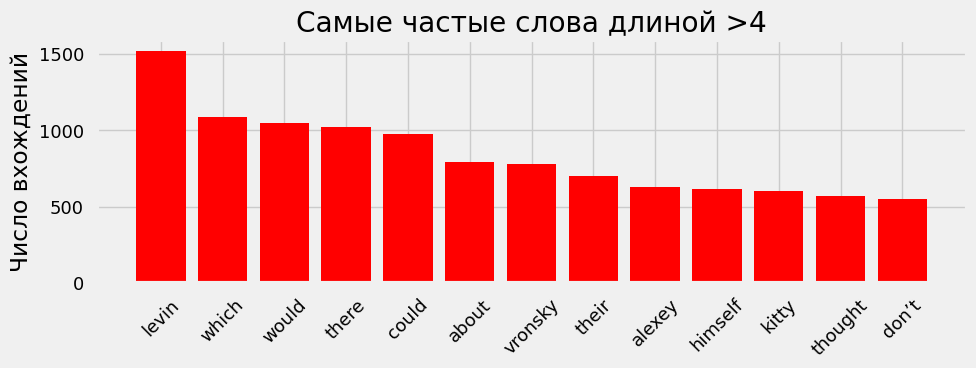

In [62]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,3))
plt.bar([k for k,v in fw],[v for k,v in fw],color='red')
plt.title('Самые частые слова длиной >4')
plt.ylabel('Число вхождений')
plt.xticks(rotation=45)
plt.show()

### Разбиение ФИО на Ф и И

In [21]:
import pandas as pd

df = pd.DataFrame({ "FullName" : ['Вася Петров','Анна Каренина']})
df

,FullName
0,Вася Петров
1,Анна Каренина


In [24]:
df['FirstName'] = df['FullName'].apply(lambda x : x.split()[0])
df['LastName'] = df['FullName'].apply(lambda x : x.split()[1])
df

,FullName,FirstName,LastName
0,Вася Петров,Вася,Петров
1,Анна Каренина,Анна,Каренина


## Работа с данными с Kaggle

In [63]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("subhajournal/movie-rating")

print("Path to dataset files:", path)

100%|██████████| 9.56M/9.56M [00:00<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/subhajournal/movie-rating/versions/1


In [65]:
!ls /root/.cache/kagglehub/datasets/subhajournal/movie-rating/versions/1

'Rotten Tomatoes Movies.csv'


In [69]:
df = pd.read_csv(path+'/Rotten Tomatoes Movies.csv')
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0


<Axes: >

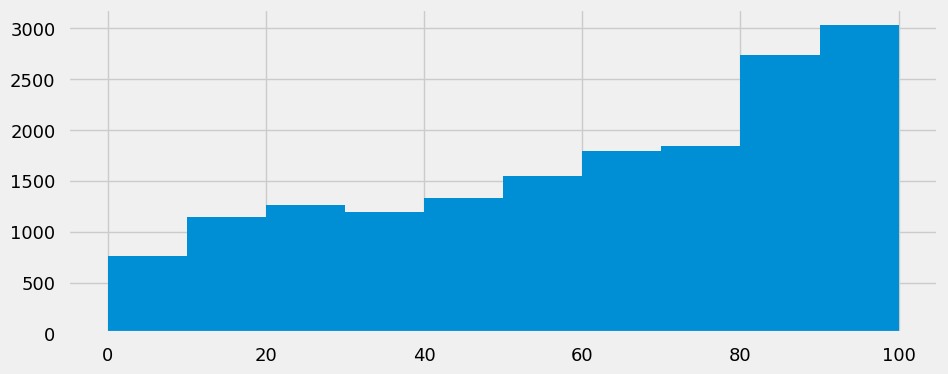

In [71]:
plt.figure(figsize=(10,4))
df['tomatometer_rating'].hist()

<Axes: xlabel='tomatometer_rating', ylabel='Count'>

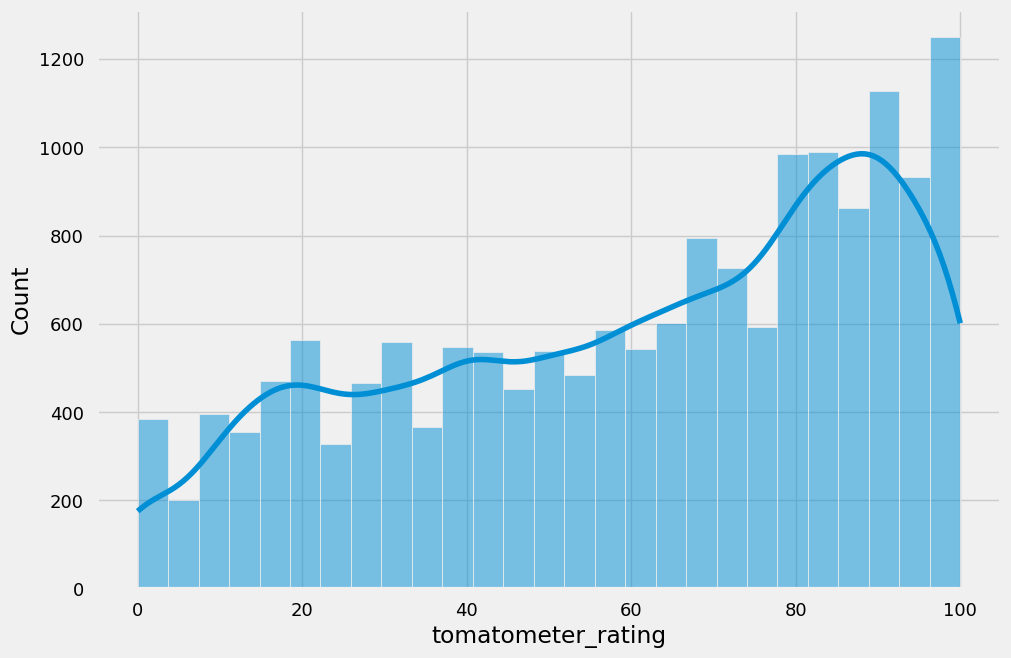

In [74]:
import seaborn as sns

sns.histplot(df['tomatometer_rating'],kde=True)

In [75]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count'],
      dtype='object')

<Axes: xlabel='audience_rating', ylabel='Count'>

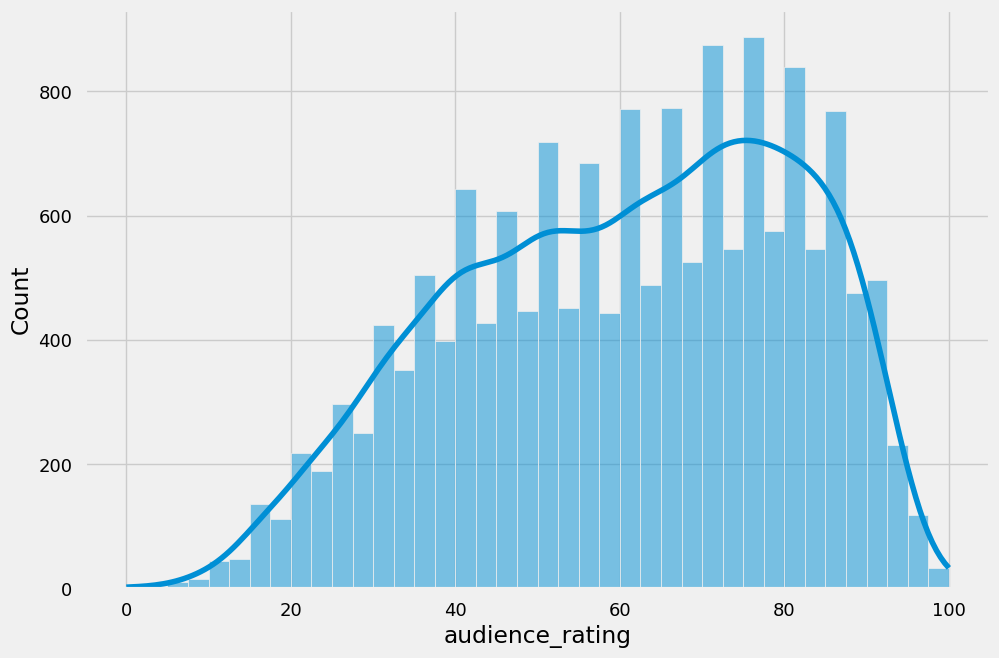

In [76]:
sns.histplot(df['audience_rating'],kde=True)

In [78]:
df.groupby('directors')['movie_title'].count()

,movie_title
directors,
A. Dean Bell,1
A. Edward Sutherland,1
A.J. Edwards,1
A.T. White,1
AJ Schnack,1
...,...
Álex de la Iglesia,4
Åke Sandgren,1
Émile Gaudreault,1


In [82]:
dirs = df.groupby('directors').agg({'audience_rating' : 'mean', 'movie_title' : 'count'}).rename(columns={'movie_title' : 'count'})
dirs

,audience_rating,count
directors,,
A. Dean Bell,50.00,1
A. Edward Sutherland,66.00,1
A.J. Edwards,41.00,1
A.T. White,46.00,1
AJ Schnack,77.00,1
...,...,...
Álex de la Iglesia,54.25,4
Åke Sandgren,65.00,1
Émile Gaudreault,66.00,1


In [84]:
dirs.sort_values('count',ascending=False)

,audience_rating,count
directors,,
Alfred Hitchcock,70.416667,36
Woody Allen,66.166667,36
Clint Eastwood,67.571429,35
Steven Spielberg,76.781250,32
Sidney Lumet,65.733333,30
...,...,...
"J.P. Sniadecki, Verena Paravel",67.000000,1
J.P. Sniadecki,50.000000,1
"J.P. Simon, Simon J. Smith, Eric Darnell",63.000000,1


<Axes: ylabel='directors'>

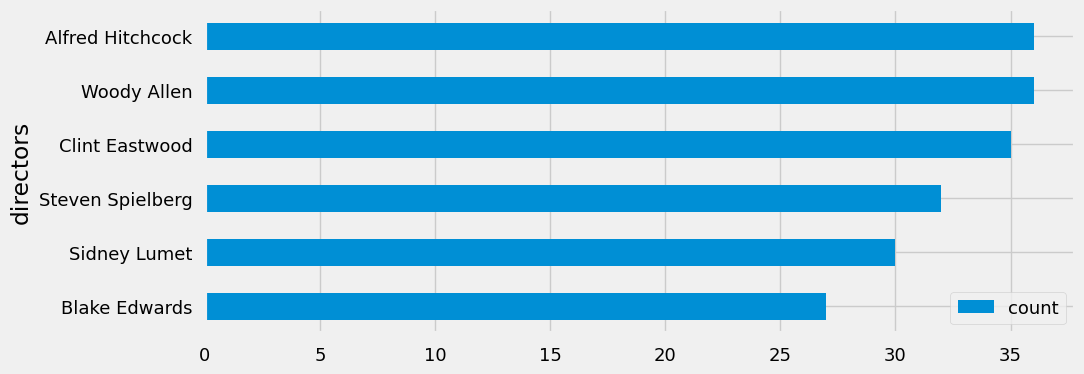

In [93]:
dirs.sort_values('count',ascending=False).iloc[5::-1].plot.barh(y='count',figsize=(10,4))

In [97]:
dirs[dirs['count']>1].sort_values('audience_rating',ascending=False).iloc[:10]

,audience_rating,count
directors,,
Bert Marcus,96.000000,2
Akira Kurosawa,94.000000,12
Masaki Kobayashi,93.500000,2
"Will Lovelace, Dylan Southern (II)",93.000000,2
Charles Ferguson (III),92.500000,2
Marcel Carné,92.500000,2
Kenji Mizoguchi,92.500000,2
Henri-Georges Clouzot,92.333333,3
Emir Kusturica,92.333333,3


In [98]:
df['genre']

,genre
0,"Action & Adventure, Comedy, Drama, Science Fic..."
1,Comedy
2,"Comedy, Romance"
3,"Classics, Drama"
4,"Action & Adventure, Drama, Kids & Family"
...,...
16633,"Drama, Musical & Performing Arts"
16634,"Action & Adventure, Animation, Comedy"
16635,"Action & Adventure, Art House & International,..."
16636,"Classics, Drama"


In [102]:
df['genre'].isna().sum() # Есть пустые жанры!

17

In [105]:
df.loc[df['genre'].isna(),'genre'] = 'Unknown'

In [109]:
df['lgenre'] = df['genre'].apply(lambda x: x.split(', '))
genres = set(df['lgenre'].sum())
genres

{'Action & Adventure',
 'Animation',
 'Anime & Manga',
 'Art House & International',
 'Classics',
 'Comedy',
 'Cult Movies',
 'Documentary',
 'Drama',
 'Faith & Spirituality',
 'Gay & Lesbian',
 'Horror',
 'Kids & Family',
 'Musical & Performing Arts',
 'Mystery & Suspense',
 'Romance',
 'Science Fiction & Fantasy',
 'Special Interest',
 'Sports & Fitness',
 'Television',
 'Unknown',
 'Western'}

In [111]:
for g in genres:
  df[g] = df['lgenre'].apply(lambda x: g in x)

df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,...,Western,Horror,Science Fiction & Fantasy,Drama,Classics,Kids & Family,Cult Movies,Unknown,Comedy,Art House & International
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,...,False,False,True,True,False,False,False,False,True,False
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,...,False,False,False,False,False,False,False,False,True,False
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,...,False,False,False,False,False,False,False,False,True,False
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,...,False,False,False,True,True,False,False,False,False,False
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,...,False,False,False,True,False,False,False,False,False,False
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,...,False,False,False,False,False,False,False,False,True,False
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,...,False,False,False,True,True,False,False,False,False,True
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,...,False,False,False,True,True,False,False,False,False,False


In [112]:
for g in genres:
  r = df[df[g]]['audience_rating'].mean()
  print(f'{g} -> {r}')

Anime & Manga -> 72.0
Musical & Performing Arts -> 71.1222339304531
Faith & Spirituality -> 70.42857142857143
Romance -> 63.58741648106904
Action & Adventure -> 57.66347305389222
Special Interest -> 71.95717884130983
Mystery & Suspense -> 54.0205500151103
Television -> 66.392
Animation -> 64.88770053475936
Documentary -> 72.93097826086957
Gay & Lesbian -> 60.26470588235294
Sports & Fitness -> 73.47398843930635
Western -> 64.56183745583039
Horror -> 46.36707511987213
Science Fiction & Fantasy -> 56.31275245239469
Drama -> 63.1067863151991
Classics -> 71.4120634920635
Kids & Family -> 60.01128880526811
Cult Movies -> 56.26
Unknown -> 63.705882352941174
Comedy -> 58.20835686053077
Art House & International -> 66.62116757664846


In [123]:
lgenres = list(genres)
rbg = pd.DataFrame({
    "Genre" : lgenres,
    "Rating" : [df[df[g]]['audience_rating'].mean() for g in lgenres ]
})
rbg

,Genre,Rating
0,Anime & Manga,72.000000
1,Musical & Performing Arts,71.122234
2,Faith & Spirituality,70.428571
3,Romance,63.587416
4,Action & Adventure,57.663473
5,Special Interest,71.957179
6,Mystery & Suspense,54.020550
7,Television,66.392000
8,Animation,64.887701
9,Documentary,72.930978


In [126]:
rbg.sort_values('Rating',ascending=False).iloc[:10]

,Genre,Rating
11,Sports & Fitness,73.473988
9,Documentary,72.930978
0,Anime & Manga,72.000000
5,Special Interest,71.957179
16,Classics,71.412063
1,Musical & Performing Arts,71.122234
2,Faith & Spirituality,70.428571
21,Art House & International,66.621168
7,Television,66.392000
8,Animation,64.887701


In [133]:
df[df['Animation']].groupby('directors')['movie_title'].count().sort_values(ascending=False).index[0]

'Jay Oliva'

In [136]:
pd.DataFrame({
    "Genre" : lgenres,
    "Director" : [
        df[df[g]].groupby('directors')['movie_title'].count().sort_values(ascending=False).index[0]
        for g in lgenres],
    "Count" : [
        df[df[g]].groupby('directors')['movie_title'].count().sort_values(ascending=False).iloc[0]
        for g in lgenres]
})

,Genre,Director,Count
0,Anime & Manga,Mamoru Oshii,3
1,Musical & Performing Arts,Charles Walters,9
2,Faith & Spirituality,Cecil B. DeMille,2
3,Romance,Woody Allen,14
4,Action & Adventure,Steven Spielberg,18
5,Special Interest,Alex Gibney,9
6,Mystery & Suspense,Alfred Hitchcock,32
7,Television,Anthony C. Ferrante,4
8,Animation,Jay Oliva,6
9,Documentary,Alex Gibney,14


In [143]:
df['cast'].isna().sum()

284

In [144]:
df.dropna(subset=['cast'],inplace=True)
df['cast'].isna().sum()

0

In [145]:
df['lcast'] = df['cast'].apply(lambda x : x.split(', '))

In [146]:
actors = set(df['lcast'].sum())
actors

{'Reathel Bean',
 'Tukey Koffend',
 'Linda Udd',
 'Klaus Händl',
 'Brian Rogalski',
 'Denise Gough',
 'Loren Omer',
 'Juan Incciarte',
 'Clinton Turnbull',
 'Leslie J. Frye',
 'Mandy Chan',
 'Alana Austin',
 'Ivan Orsanyi',
 'Newt Gingrich',
 'Sergey Garmash',
 'Alfie Curtis',
 'Sam Scudder',
 'Valerie Gale',
 'Benny Golson',
 'Valerie M. Agnew',
 'Jay Craven',
 'Tom McBride',
 'Fatma Deniz Yildiz',
 'Alexander De Bont',
 'Calvin Ahn',
 'Mireia Renau',
 'Jillian Kramer',
 'Tim Ries',
 'Yvonne Doughty',
 'Julie Guio',
 'Laura Prepon',
 'Luis Callejo',
 'Lisa Gleave',
 'Darren McHugh',
 'Alfredo Narciso',
 'Natasha Soll',
 'Julius Fleischanderl',
 'Bob Pond',
 'Sheila Agee',
 'Pat Gleason',
 'Jennifer Sims',
 'Estelle Morgan',
 'Kimberley Canova',
 'Des Bishop',
 'Billy Parker',
 'Melissa Wiltsie',
 'Emma Lesser',
 'Brent Howard Knudsen',
 'Cristina Pronzati',
 'Emil Lager',
 'Camilla Simson',
 'Carson Brown',
 'Gu Yaping',
 'Sarah Schoofs',
 'Nathan Cogan',
 'Janelle Ortiz',
 'Michael M

In [147]:
from tqdm.auto import tqdm

res = {}
for a in tqdm(actors):
  res[a] = df[df['lcast'].apply(lambda x: a in x)]['audience_rating'].mean()

  0%|          | 0/198666 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [151]:
res = {}
for _,row in tqdm(df.iterrows()):
  for a in row['lcast']:
    if a in res:
      res[a].append(row['audience_rating'])
    else:
      res[a] = [row['audience_rating']]


0it [00:00, ?it/s]

In [154]:
import numpy as np

ratings = { k : np.mean(v) for k,v in res.items() }
ratings

{'Logan Lerman': 64.4,
 'Brandon T. Jackson': 53.0,
 'Alexandra Daddario': 48.92857142857143,
 'Jake Abel': 53.36363636363637,
 'Sean Bean': 57.925,
 'Pierce Brosnan': 53.53061224489796,
 'Steve Coogan': 56.604651162790695,
 'Rosario Dawson': nan,
 'Melina Kanakaredes': 65.5,
 'Catherine Keener': 58.86,
 'Kevin Mckidd': 62.15,
 'Joe Pantoliano': 53.073170731707314,
 'Uma Thurman': 51.02439024390244,
 'Ray Winstone': 52.52777777777778,
 'Julian Richings': 56.6,
 'Bonita Friedericy': 48.333333333333336,
 'Annie Ilonzeh': 53.0,
 'Tania Saulnier': 45.666666666666664,
 'Marie Avgeropoulos': 57.4,
 "Luisa D'Oliveira": 64.0,
 'Christie Laing': 66.0,
 'Marielle Jaffe': 54.0,
 'Elisa King': 57.0,
 'Chrystal Tisiga': 53.0,
 'Alexis Knapp': 50.1,
 'Charlie Gallant': 53.0,
 'Chelan Simmons': 58.5,
 'Andrea Brooks': 70.5,
 'Natassia Malthe': 39.6,
 'Max Van Ville': 55.888888888888886,
 'Serinda Swan': 43.4,
 'Dimitri Lekkos': 53.0,
 'Ona Grauer': 37.5,
 'Stefanie von Pfetten': 40.0,
 'Conrad Coates

In [157]:
ratings = [
    { "Name" : k,
      "Rating" : np.mean(v),
      "Count" : len(v)
    }
    for k,v in res.items() ]

rat = pd.DataFrame(ratings)
rat

,Name,Rating,Count
0,Logan Lerman,64.400000,20
1,Brandon T. Jackson,53.000000,17
2,Alexandra Daddario,48.928571,14
3,Jake Abel,53.363636,11
4,Sean Bean,57.925000,40
...,...,...,...
198661,Daniel Tshabalala,91.000000,1
198662,Ephraim Mbhele,91.000000,1
198663,Brian O'Shaunnessy,62.000000,1
198664,Midge Carter,62.000000,1


In [159]:
rat[rat['Count']>5].sort_values('Rating',ascending=False)

,Name,Rating,Count
10681,Kamatari Fujiwara,95.000000,6
22094,Henry Bergman,94.857143,7
106994,Tatsuya Nakadai,94.000000,8
22086,Charles Chaplin,93.250000,8
120740,Gunnel Lindblom,92.166667,6
...,...,...,...
106344,Stephanie Beatriz,NaN,6
111316,Frank Marshall,NaN,7
111672,Alice Lowe,NaN,7
129907,Karl Glusman,NaN,6


from matplotlib import pyplot as plt
_df_7['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Rating', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [160]:
rat.sort_values('Count',ascending=False)

,Name,Rating,Count
5822,Jr.,NaN,115
3964,Samuel L. Jackson,63.104762,105
3883,Bruce Willis,52.712644,87
414,Robert De Niro,60.149425,87
1810,Steve Buscemi,60.804878,82
...,...,...,...
91427,Habib Chetoui,83.000000,1
91428,Philipa Day,83.000000,1
91429,Phillipa Bay,83.000000,1
91430,Paul Kant,83.000000,1
